<a href="https://colab.research.google.com/github/Shahar94/EDA-Project/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
census = pd.read_csv('/content/census.csv')
census

#cnt = Number of people using the drug
#DK, NO, SE = Denmark, Norway and Sweden

,year,sex,age,cnt,country
0,2007,F,5-9,164148,DK
1,2007,F,10-14,171864,DK
2,2007,F,15-19,157037,DK
3,2007,M,5-9,172068,DK
4,2007,M,10-14,181190,DK
...,...,...,...,...,...
193,2017,F,15-19,258776,SE
194,2017,F,5-9,297294,SE
195,2017,M,10-14,298557,SE
196,2017,M,15-19,286062,SE


In [4]:
drug_names = pd.read_csv('/content/drug_names.csv')
drug_names

,atc,formalname
0,N06A,Antidepressants
1,N06AA,Non-selective monoamine reuptake inhibitors
2,N06AA01,Desipramine
3,N06AA02,Imipramine
4,N06AA03,Imipramine oxide
...,...,...
64,N06AX22,Agomelatine
65,N06AX23,Desvenlafaxine
66,N06AX24,Vilazodone
67,N06AX25,Hyperici herba


In [5]:
drug_use = pd.read_csv("/content/drug_use.csv")
drug_use.head(15)

#DDD = drug daily dose
#cnt = Number of people using the drug
#ddd_pr_1000 = ddd/cnt
#users_pr_1000 = nusers/cnt

,atc,year,sex,age,nusers,ddd,users_pr_1000,ddd_pr_1000,country,drug_group
0,N06A,2007,F,5-9,43,7000.0,0.261959,42.644444,DK,AD
1,N06A,2007,M,5-9,98,17000.0,0.569542,98.798149,DK,AD
2,N06A,2007,F,10-14,653,191000.0,3.799516,1111.343872,DK,AD
3,N06A,2007,M,10-14,581,175000.0,3.206579,965.836975,DK,AD
4,N06A,2007,F,15-19,5578,1499000.0,35.520290,9545.521484,DK,AD
5,N06A,2007,M,15-19,2429,645000.0,14.651595,3890.604736,DK,AD
6,N06AA,2007,F,5-9,9,0.0,0.054829,0.000000,DK,TCA
7,N06AA,2007,M,5-9,27,0.0,0.156915,0.000000,DK,TCA
8,N06AA,2007,F,10-14,43,1000.0,0.250198,5.818554,DK,TCA
9,N06AA,2007,M,10-14,50,3000.0,0.275953,16.557205,DK,TCA


# **Data Preparation**

In [6]:
ssri_data = drug_use[drug_use['drug_group'] == 'SSRI']
ssri_data

,atc,year,sex,age,nusers,ddd,users_pr_1000,ddd_pr_1000,country,drug_group
96,N06AB,2007,F,5-9,28,6000.0,0.170578,36.552380,DK,SSRI
97,N06AB,2007,M,5-9,66,15000.0,0.383569,87.174835,DK,SSRI
98,N06AB,2007,F,10-14,580,181000.0,3.374761,1053.158325,DK,SSRI
99,N06AB,2007,M,10-14,516,167000.0,2.847839,921.684448,DK,SSRI
100,N06AB,2007,F,15-19,4864,1296000.0,30.973593,8252.832031,DK,SSRI
...,...,...,...,...,...,...,...,...,...,...
9418,N06AB10,2017,M,5-9,5,1460.0,0.015879,4.636599,SE,SSRI
9419,N06AB10,2017,F,10-14,108,22784.0,0.383120,80.824135,SE,SSRI
9420,N06AB10,2017,M,10-14,64,17863.0,0.214364,59.831120,SE,SSRI
9421,N06AB10,2017,F,15-19,1919,465060.0,7.415680,1797.152710,SE,SSRI


<ipython-input-7-ed002e78a46a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = drug_use.corr()


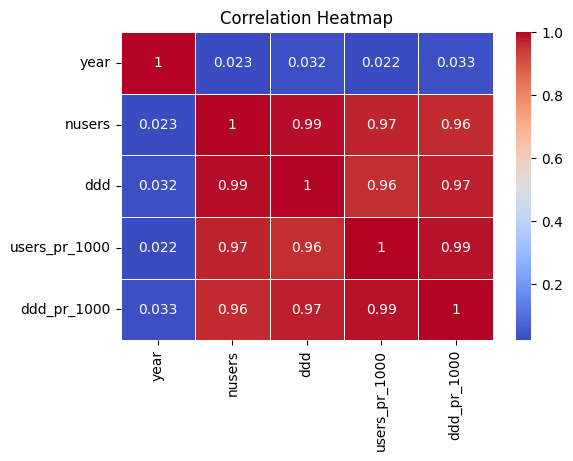

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = drug_use.corr()

# Create the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

In [8]:
drug_use.describe()
#drug_use.info()

,year,nusers,ddd,users_pr_1000,ddd_pr_1000
count,9579.000000,9579.000000,9.579000e+03,9579.000000,9579.000000
mean,2011.998121,138.939242,3.890860e+04,0.644454,179.865414
std,3.162673,777.880384,2.462252e+05,3.369606,1062.836887
min,2007.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2009.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,2012.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,2015.000000,5.000000,2.483333e+02,0.029096,1.052374
max,2017.000000,17548.000000,6.135492e+06,67.811546,23709.664062


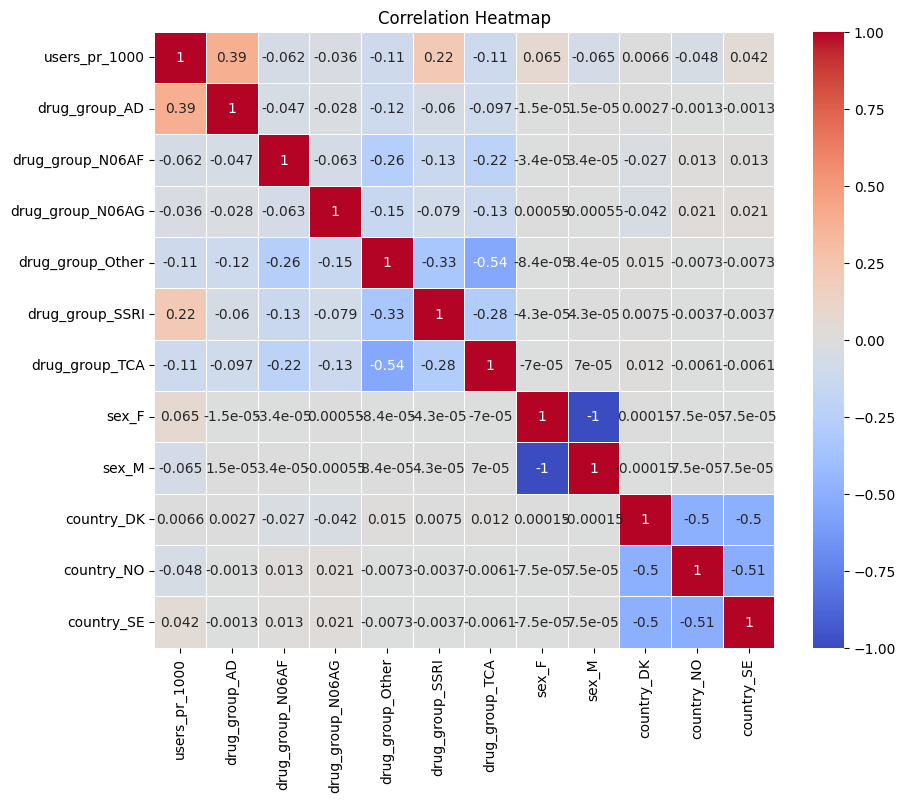

In [9]:
selected_columns = ['users_pr_1000', 'drug_group', 'sex', 'country']

# Subset the DataFrame with selected columns
subset_data = drug_use[selected_columns]

# Convert categorical variables to numeric representation
encoded_data = pd.get_dummies(subset_data)

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

In [10]:
drug_use['drug_group'].unique()

#TCA - Tricyclic Antidepressant

array(['AD', 'TCA', 'SSRI', 'N06AF', 'N06AG', 'Other'], dtype=object)

In [11]:
drug_use['atc'].unique()

array(['N06A', 'N06AA', 'N06AA01', 'N06AA02', 'N06AA04', 'N06AA05',
       'N06AA06', 'N06AA07', 'N06AA08', 'N06AA09', 'N06AA10', 'N06AA11',
       'N06AA12', 'N06AA16', 'N06AA17', 'N06AA21', 'N06AB', 'N06AB03',
       'N06AB04', 'N06AB05', 'N06AB06', 'N06AB08', 'N06AB10', 'N06AF',
       'N06AF01', 'N06AF03', 'N06AF04N06AG', 'N06AG', 'N06AG02', 'N06AX',
       'N06AX01', 'N06AX02', 'N06AX03', 'N06AX05', 'N06AX06', 'N06AX09',
       'N06AX11', 'N06AX12', 'N06AX14', 'N06AX16', 'N06AX17', 'N06AX18',
       'N06AX21', 'N06AX22', 'N06AX23', 'N06AX24', 'N06AX25', 'N06AX26',
       'N06AF04'], dtype=object)

In [12]:
drug_use['country'].unique()

array(['DK', 'NO', 'SE'], dtype=object)

In [13]:
df = drug_use[['year', 'sex', 'age', 'users_pr_1000', 'ddd_pr_1000', 'country']].set_index(drug_use['drug_group'])
df.head(10)

,year,sex,age,users_pr_1000,ddd_pr_1000,country
drug_group,,,,,,
AD,2007,F,5-9,0.261959,42.644444,DK
AD,2007,M,5-9,0.569542,98.798149,DK
AD,2007,F,10-14,3.799516,1111.343872,DK
AD,2007,M,10-14,3.206579,965.836975,DK
AD,2007,F,15-19,35.520290,9545.521484,DK
AD,2007,M,15-19,14.651595,3890.604736,DK
TCA,2007,F,5-9,0.054829,0.000000,DK
TCA,2007,M,5-9,0.156915,0.000000,DK
TCA,2007,F,10-14,0.250198,5.818554,DK


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
sex = drug_use['sex']
drug_users = drug_use['users_pr_1000']
age = drug_use['age']

In [16]:
female_count = sex[sex == 'F'].size
male_count = sex[sex == 'M'].size

print(female_count, male_count)

4790 4789


In [17]:
age.unique()

array(['5-9', '10-14', '15-19'], dtype=object)

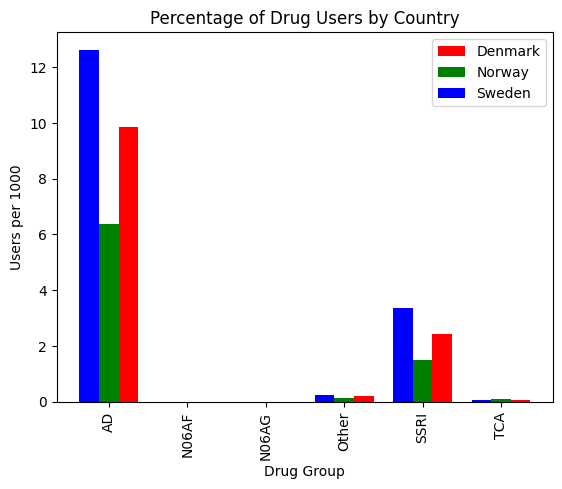

In [18]:
pivot_df = df.pivot_table(values= 'users_pr_1000', index= df.index, columns= 'country')  # index = drug_group
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['DK'], width=width, color='r', label='Denmark')
plt.bar(x_index, pivot_df['NO'], width=width, color='g', label='Norway')
plt.bar(x_index - width, pivot_df['SE'], width=width, color='b', label='Sweden')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by Country')

plt.legend()
plt.show()

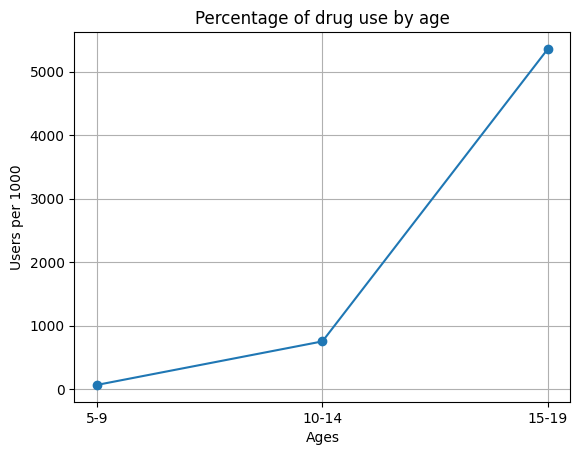

In [19]:
sum_5_9 = drug_use.loc[drug_use['age'] == '5-9', 'users_pr_1000'].sum()
sum_10_14 = drug_use.loc[drug_use['age'] == '10-14', 'users_pr_1000'].sum()
sum_15_19 = drug_use.loc[drug_use['age'] == '15-19', 'users_pr_1000'].sum()

age_groups = ["5-9", "10-14","15-19"]
drug_users = [sum_5_9,sum_10_14,sum_15_19]

plt.plot(age_groups, drug_users, marker="o")
plt.xlabel("Ages")
plt.ylabel("Users per 1000")
plt.title("Percentage of drug use by age")
plt.grid(True)
plt.show()

In [20]:
# Comparing the age of those using different types of antidepressants in each country

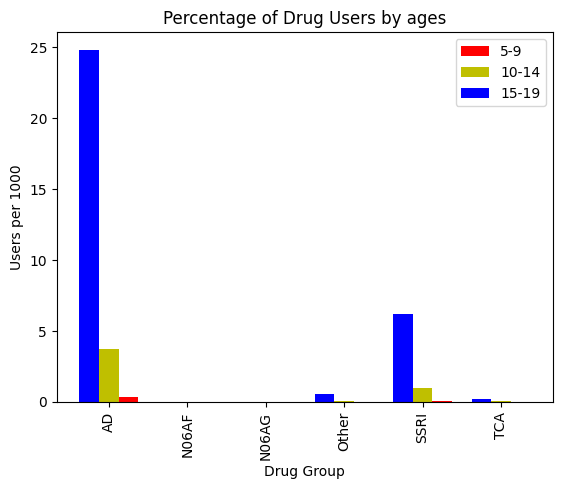

In [21]:
pivot_df = df.pivot_table(values= 'users_pr_1000', index= df.index, columns= 'age')  # index = drug_group
pivot_df = pivot_df.fillna(0)

pivot_df = df.pivot_table(values= 'users_pr_1000', index= df.index, columns= 'age')  # index = drug_group
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['5-9'], width=width, color='r', label='5-9')
plt.bar(x_index, pivot_df['10-14'], width=width, color='y', label='10-14')
plt.bar(x_index - width, pivot_df['15-19'], width=width, color='b', label='15-19')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by ages')

plt.legend()
plt.show()

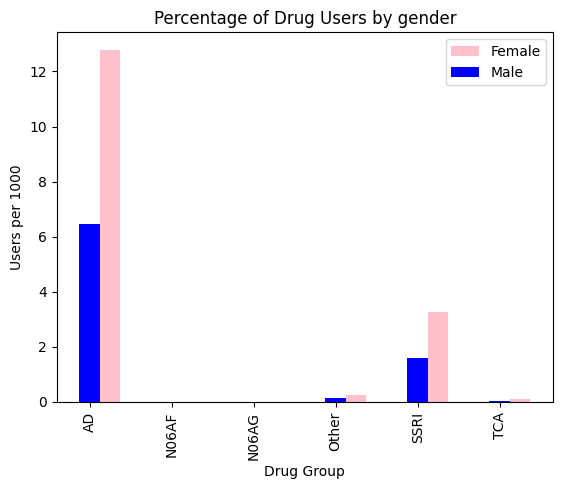

In [22]:
# Comparing the sex of those using different types of antidepressants in each country

pivot_df = df.pivot_table(values= 'users_pr_1000', index= df.index, columns= 'sex')  # index = drug_group
pivot_df = pivot_df.fillna(0)

pivot_df = df.pivot_table(values= 'users_pr_1000', index= df.index, columns= 'sex')  # index = drug_group
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['F'], width=width, color='pink', label='Female')
plt.bar(x_index, pivot_df['M'], width=width, color='blue', label='Male')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by gender')

plt.legend()
plt.show()

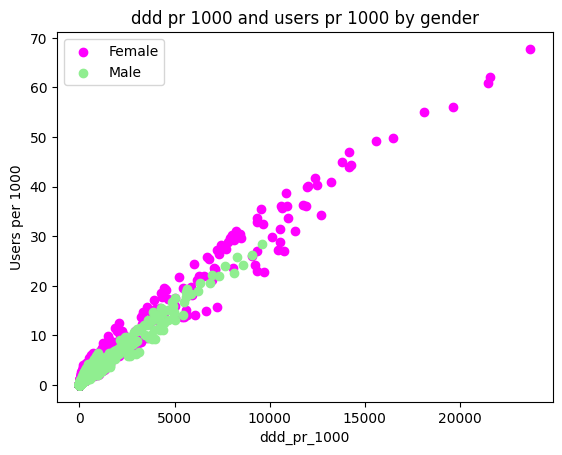

In [23]:
fig, ax = plt.subplots()

cs = ['lightgreen' if g == 'M' else 'magenta' for g in drug_use['sex']]

ax.scatter(x=drug_use[drug_use['sex'] == 'F']['ddd_pr_1000'],
           y=drug_use[drug_use['sex'] == 'F']['users_pr_1000'],
           c='magenta', label='Female')

ax.scatter(x=drug_use[drug_use['sex'] == 'M']['ddd_pr_1000'],
           y=drug_use[drug_use['sex'] == 'M']['users_pr_1000'],
           c='lightgreen', label='Male')

ax.set_xlabel('ddd_pr_1000')
ax.set_ylabel('Users per 1000')
ax.set_title('ddd pr 1000 and users pr 1000 by gender')
ax.legend()
plt.show()

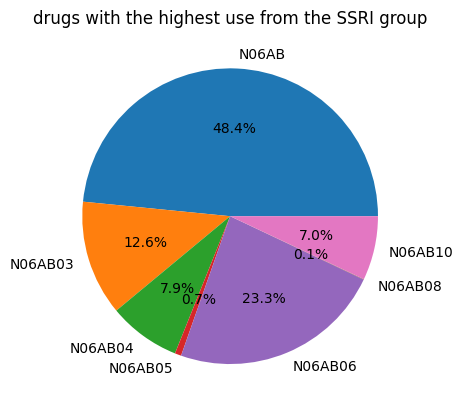

In [24]:
ssri_data = drug_use[drug_use['drug_group'] == 'SSRI']

atc_data = ssri_data.groupby('atc')['users_pr_1000'].sum()

# Extract the ATC names and corresponding user counts
atc_names = atc_data.index.tolist()
user_counts = atc_data.values.tolist()

plt.pie(user_counts, labels=atc_names, autopct='%1.1f%%')

plt.title('drugs with the highest use from the SSRI group')

plt.show()

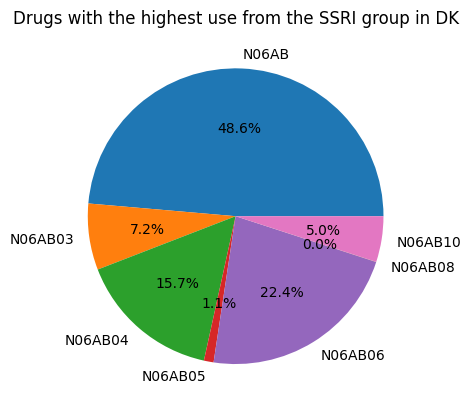

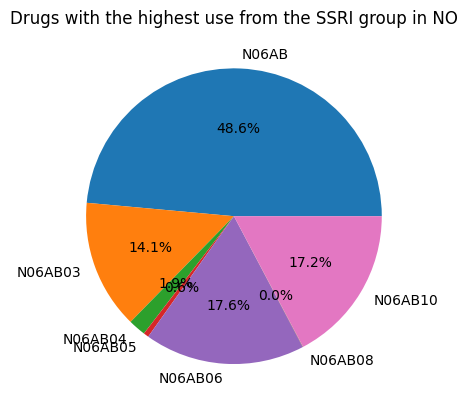

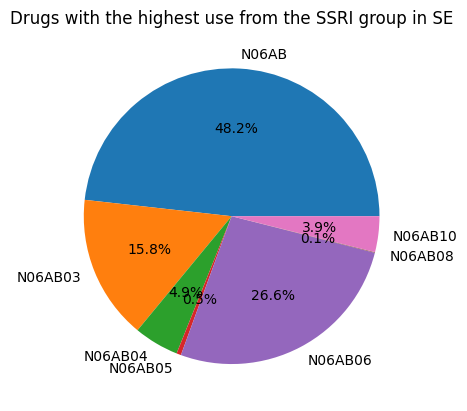

In [25]:
ssri_data = drug_use[drug_use['drug_group'] == 'SSRI']
countries = drug_use['country'].unique()

# Iterate over each country and create a pie chart
for country in countries:
    country_data = ssri_data[ssri_data['country'] == country]
    atc_data = country_data.groupby('atc')['users_pr_1000'].sum()

    # Extract the ATC names and corresponding user counts
    atc_names = atc_data.index.tolist()
    user_counts = atc_data.values.tolist()

    plt.pie(user_counts, labels=atc_names, autopct='%1.1f%%')
    plt.title(f'Drugs with the highest use from the SSRI group in {country}')
    plt.show()